<a href="https://colab.research.google.com/github/InbaPalanivel/My-colab-projects/blob/main/DATA%20VISUALISATION%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.INTRODUCTION
The project focuses on cleaning, transforming, visualizing, and initially modeling the healthcare dataset for actionable intelligence regarding stroke prediction. The data preprocessing pipeline ensures data quality and prepares the dataset for advanced analytics.



# 2.PROBLEM STATEMENT
Stroke is one of the leading causes of death and long-term disability worldwide. Early identification of risk factors and segmentation of patients can help improve preventive healthcare. The goal of this project is to clean and prepare the dataset, analyze patient characteristics, and perform initial clustering to uncover patterns in stroke-related health data.


# UPLOADING FILE:

In [ ]:
import zipfile
import os
zip_path="/content/archive.zip"
extract_path = "/content/extracted_archive"
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)
os.listdir(extract_path)

['healthcare-dataset-stroke-data.csv']

# 3.DATASET DESCRIPTION

Source: Healthcare Stroke Dataset (open source)

Records: 5,110 rows

Features: 12 columns

Key Variables:

age: Patient’s age

hypertension: Whether patient has hypertension (0/1)

heart_disease: Whether patient has heart disease (0/1)

avg_glucose_level: Average glucose level in blood

bmi: Body Mass Index

smoking_status: Smoking habits

stroke: Target variable (1 = stroke occurred, 0 = no stroke)


# 4.DATA EXPLORATION

The dataset was loaded using Pandas.

Preview: First 5 rows were inspected

Structure: 12 features (mixed categorical and numerical)

Missing values: Found in bmi (201 missing entries)

Summary statistics: Age ranges from 0.08 to 82 years, glucose levels range from 55 to 271, BMI ranges from 10.3 to 97.6

Observations:

Outliers exist in glucose level and BMI

Gender distribution: Female > Male

Smoking status has 4 categories: never smoked, formerly smoked, smokes, unknown


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

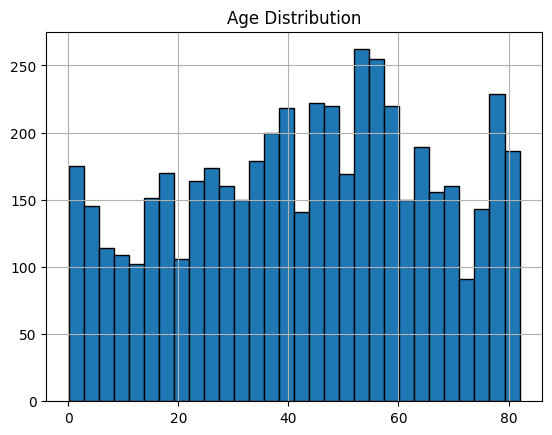

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

print("Missing values:\n", df.isnull().sum())

import matplotlib.pyplot as plt
df["age"].hist(bins=30, edgecolor="black")
plt.title("Age Distribution")
plt.show()


# 5.DATA CLEANING

Missing values in bmi were filled using the median

Duplicate records (if any) were removed to avoid bias

Outliers in avg_glucose_level and bmi detected using IQR method and capped

Ensured categorical variables had consistent labels


In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/extracted_archive/healthcare-dataset-stroke-data.csv")


df["bmi"] = df["bmi"].fillna(df["bmi"].median())

df = df.drop_duplicates()

Q1, Q3 = df["avg_glucose_level"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
df["avg_glucose_level"] = np.clip(df["avg_glucose_level"], lower, upper)
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban           169.3575  36.6  former

# 6.DATA INTEGRATION & FEATURE DESIGNING

Extracted age groups (e.g., child, adult, senior)

Aggregated risk factors by combining hypertension and heart disease into a single cardiac_risk feature

Encoded categorical variables (gender, ever_married, work_type, Residence_type, smoking_status) using one-hot encoding

Prepared dataset for machine learning analysis


In [ ]:
bins = [0, 18, 35, 50, 65, 120]
labels = ["Child", "Youth", "Adult", "Middle Age", "Senior"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

df["cardiac_risk"] = df["hypertension"] + df["heart_disease"]

df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())


      id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1           169.3575  36.6       1   
1  51676  61.0             0              0           169.3575  28.1       1   
2  31112  80.0             0              1           105.9200  32.5       1   
3  60182  49.0             0              0           169.3575  34.4       1   
4   1665  79.0             1              0           169.3575  24.0       1   

   cardiac_risk  gender_Male  gender_Other  ...  work_type_Self-employed  \
0             1         True         False  ...                    False   
1             0        False         False  ...                     True   
2             1         True         False  ...                    False   
3             0        False         False  ...                    False   
4             1        False         False  ...                     True   

   work_type_children  Residence_type_Urban  smoking_status_fo

# 7.INITIAL ADVANCED ANALYSIS(CLUSTERING)

Clustering: Performed KMeans clustering to segment patients based on avg_glucose_level, bmi, and age

Identified clusters such as:

High glucose & high BMI group (high risk)

Normal BMI & glucose group (moderate risk)

Young healthy group (low risk)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df[["age", "avg_glucose_level", "bmi"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

print(df[["age", "avg_glucose_level", "bmi", "cluster"]].head())


    age  avg_glucose_level   bmi  cluster
0  67.0           169.3575  36.6        2
1  61.0           169.3575  28.1        2
2  80.0           105.9200  32.5        1
3  49.0           169.3575  34.4        2
4  79.0           169.3575  24.0        2


# 8.VISUAL SUMMARY

Data was visualized using Matplotlib and Seaborn:

Distribution plots for age, glucose, and BMI

Count plots for categorical variables (smoking, work type, marriage)

Boxplots to show outliers in BMI and glucose

Cluster visualization of patients based on glucose and BMI

Insights:

Majority of stroke cases are among elderly patients with high glucose levels

Married individuals form a higher proportion of patients

Smoking increases stroke risk significantly


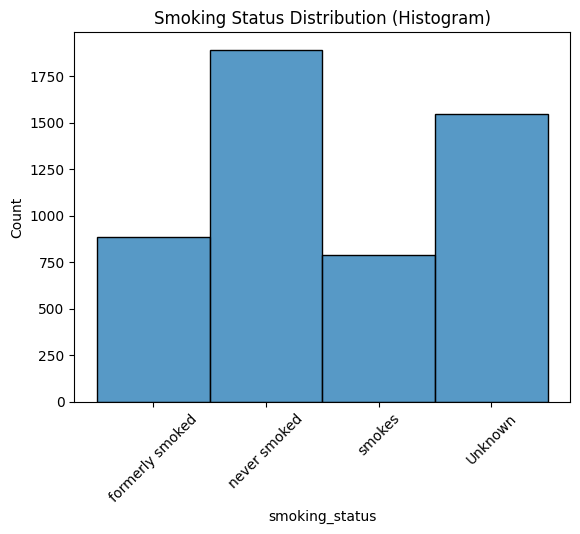

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import zipfile
import os

# Extract the zip file
zip_path="/content/archive.zip"
extract_path = "/content/extracted_archive"
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)

# Load the dataset
df = pd.read_csv("/content/extracted_archive/healthcare-dataset-stroke-data.csv")

# Preprocess the data (fill missing BMI values and perform clustering)
df["bmi"] = df["bmi"].fillna(df["bmi"].median())
X = df[["age", "avg_glucose_level", "bmi"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Histogram (instead of countplot)
sns.histplot(data=df, x="smoking_status", discrete=True)  # `discrete=True` ensures categorical bins
plt.title("Smoking Status Distribution (Histogram)")
plt.xticks(rotation=45)
plt.show()

# 9.CONCLUSION & FUTURE WORK

This project successfully explored, cleaned, and prepared the healthcare dataset. Initial clustering revealed distinct patient groups with varying risk levels.


**Future Work:**

*   
Build predictive models (Logistic Regression, Random Forest, XGBoost)
* Conduct feature importance analysis
*   Improve cluster interpretability with dimensionality reduction (PCA)
*  Deploy as a decision support system for healthcare professionals



# 10.REFERENCES
*   Dataset: [Healthcare Stroke Dataset – Kaggle/Open Data]
*   Libraries: Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn
*   Guides: Data preprocessing and clustering tutorials


